Welcome to the Drawdown Solutions library!

This jupyter notebook is a stub.  It needs to be expanded to include additional useful samples.

(A helpful tutorial for jupyter notebooks is [here](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb)---or [here](https://youtu.be/3C9E2yPBw7s?t=131) if you'd prefer a video introduction.)

# Working with Solutions/Scenarios

In [49]:
from platform import python_version

print(python_version())

3.9.13


In [59]:
# Import modules we'll use later

from solution import factory
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')

In [60]:
# The factory module has several ways of constructing solutions and scenarios.
# The simplest is to get the most recent PDS scenario of a particular type for a particular solution

bikeinfra_pds2 = factory.load_scenario("bikeinfrastructure", "PDS2")
ev_pds1 = factory.load_scenario("electricvehicles","PDS1")
ev_pds2 = factory.load_scenario("electricvehicles","PDS2")
ev_pds3 = factory.load_scenario("electricvehicles","PDS3")

In [36]:
# Running a scenario should be super quick. So what's happening behind the scenes? 
# Well, the line of code is calling on a specific script. The script is hidden at:
# /solutions/solution/bikeinfrastructure/__init__.py 
# About halfway down the "__init__.py" is all of the subscripts that are being run to produce our results!

# If you're interested in checking out each subscript you can go into the 
# /solutions/model/ directory to check each one out.

# Not every subscript nickname is descriptive so here is a list of a few important ones:
    # ac: Advanced Controls
    # ad: Adoption Data
    # ae: Agro-Ecological Zoning Allocation of the Land
    # c2: CO2 Emissions Calculations & FaIR Climate Modeling
    # c4: CH4 Emissions Calculations
    # ef: Emissions Factors for converting to CO2eq
    # fc: First Costs
    # ht: Helper Tables
    # n2o: N2O Emissions Calculations
    # name: Naming Convention of the Solution
    # oc: Operating Cost
    # pds_ca: Custom Adoption Data for the Project Drawdown Scenario
    # ref_ca: Custom Adoption Data for the Reference Scenario
    # scenario: Naming Convention of the Scenario
    # solution_category: LAND
    # tla_per_region: Total Land Area for each Drawdown Region
    # ua: Unit Adoption (a mix of functions to calculate annual adoption)
    # units: Units for first cost, functional unit, implementation unit, operating cost
    # vmas: Variable Meta Analysis Datasets
    
# The way to call on these is in the naming convention:
# solutionname.subscriptname.variablename


In [62]:
# Do Simple Analysis to Compare to .xlsm Models
# Changes To Test: First costs, operating costs, fuel efficiency, 
# -- base adoptions/shares, regional adoption data, lRates, ELc-usage, fuel saved, 
# -- EF's, Indir Emiss, occupancy, TAM, adoption

#Copy over scenario
ev_pds4_params = ev_pds3.ac.as_dict()

# Make one or more modifications
ev_pds4_params['pds_2014_cost'] = 54000;
ev_pds4_params['ref_2014_cost'] = 54000;

# Create new scenario
ev_pds4 = factory.load_scenario('electricvehicles', ev_pds4_params)
ev_pds4.get_key_results()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Furness\\Documents\\Professional Initiatives\\RegenIntel\\git\\climateSolutions\\solution\\electricvehicles\\tam\\tam_ref_sources.json'

In [52]:
# Let's explore and practice calling the results!

# All the work of calculating carbon impact, capital cost and operating cost for the scenario 
# was done by that constructure.  Here, for example, is the carbon impact.  (In this case, we
# only have global data, and only modeled out to 2050)

# Units: Megatons of CO2-eq emissions

ev_co2e1 = ev_pds1.c2.co2eq_mmt_reduced()
ev_co2e3 = ev_pds1.c2.co2eq_mmt_reduced()
ev_co2e3

AttributeError: 'DataFrame' object has no attribute 'get_key_results'

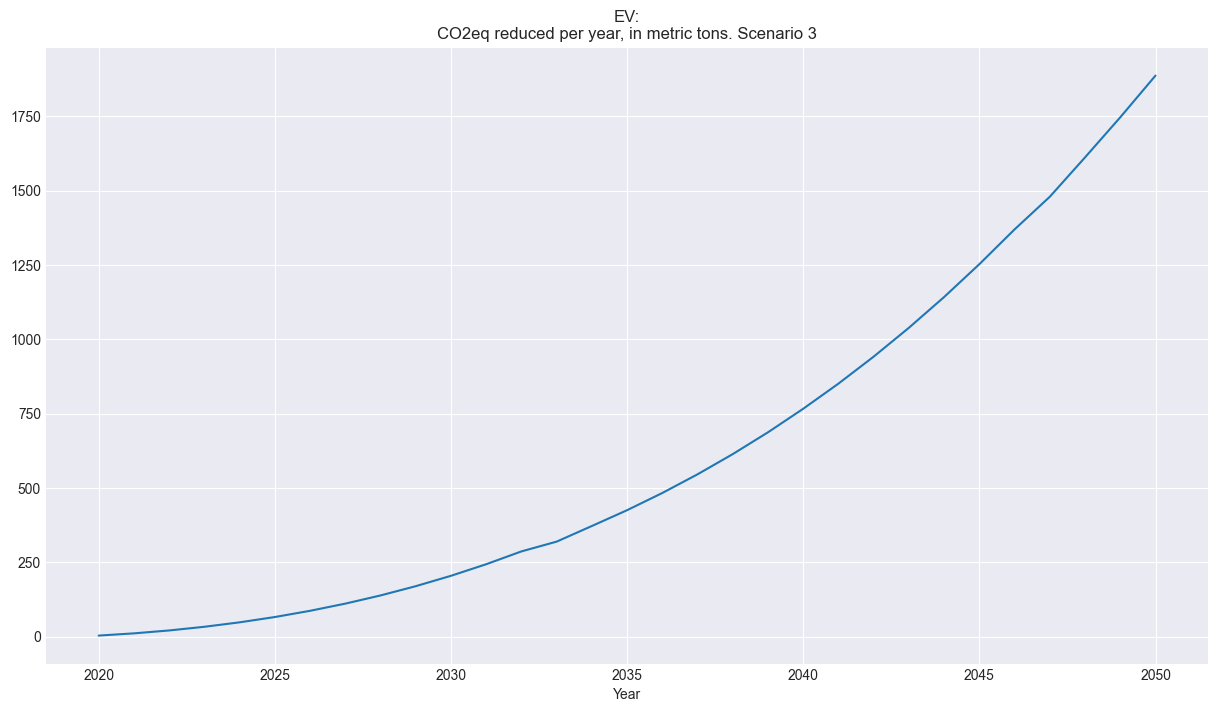

In [38]:
# The result is a pandas Dataframe, so you can do lots of things with it.
# Lets graph the part of it that is interesting

ev_co2e3.loc[2020:2050, 'World'].plot(title="EV:\nCO2eq reduced per year, in metric tons. Scenario 3");

In [39]:
# Let's add up all the years to see our total cumulative CO2-eq emission reduction

# Units: Megatons of CO2-eq emissions

ev_co2eq_cumulative = ev_co2e3.sum(axis=0)
ev_co2eq_cumulative

World                     18965.037956
OECD90                        0.000000
Eastern Europe                0.000000
Asia (Sans Japan)             0.000000
Middle East and Africa        0.000000
Latin America                 0.000000
China                         0.000000
India                         0.000000
EU                            0.000000
USA                           0.000000
dtype: float64

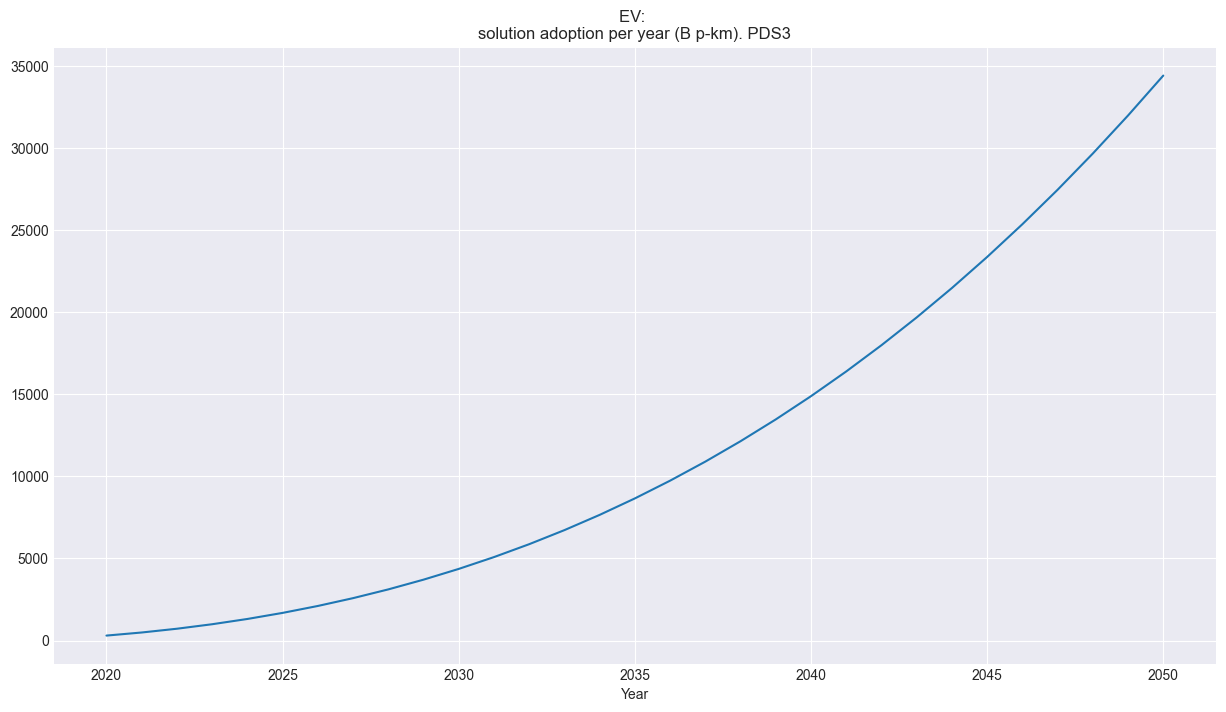

In [40]:
# Here's a second example for the NET functional units adopted. That is to say the projected yearly increase
# in adoption of the solution.

# Units: Billion Passenger Kilometers (BPKm) per year

ev_netfunits = ev_pds3.ua.soln_net_annual_funits_adopted()
ev_netfunits.loc[2020:2050, 'World'].plot(title="EV: \nsolution adoption per year (B p-km). PDS3");

In [41]:
# Let's add up all the years to see our total adoption of the solution

# Units: Megatons of CO2-eq emissions

ghgreduced_co2eq_cumulative = ev_co2e3.sum(axis=0)
ghgreduced_co2eq_cumulative

World                     18965.037956
OECD90                        0.000000
Eastern Europe                0.000000
Asia (Sans Japan)             0.000000
Middle East and Africa        0.000000
Latin America                 0.000000
China                         0.000000
India                         0.000000
EU                            0.000000
USA                           0.000000
dtype: float64

In [42]:
# To look at some economic results, we'll show the marginal operating cost.

# Units: US$ (2014)

ev_opcost = ev_pds3.oc.marginal_annual_operating_cost()

# Print the cumulative margainal operating cost over the 2020-2050 period
ev_opcost_cumulative = ev_opcost.sum(axis=0)/(10**12)
print(f"Marginal Ops Cost: ${ev_opcost_cumulative:.2f} trillion")

Marginal Ops Cost: $29.73 trillion


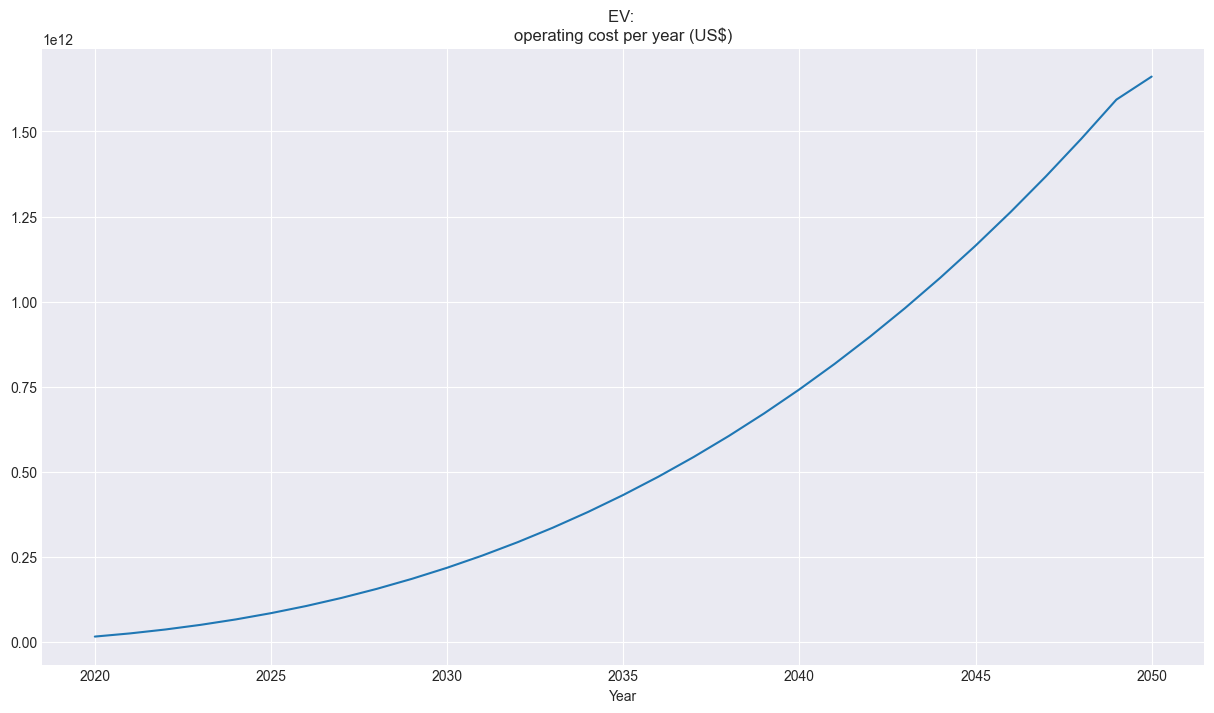

In [43]:
# Plot of the annual marginal operating cost
ev_opcost.loc[2020:2050].plot(title="EV: \noperating cost per year (US$)");

## Multi-gas emission results

In [44]:
# Let's show some more results for a multi-gas solution in the agricultural sector!
# We'll work with the Improved Rice solution and it's conservative scenario, PDS3

rice_pds3 = factory.load_scenario("improvedrice", "PDS3")

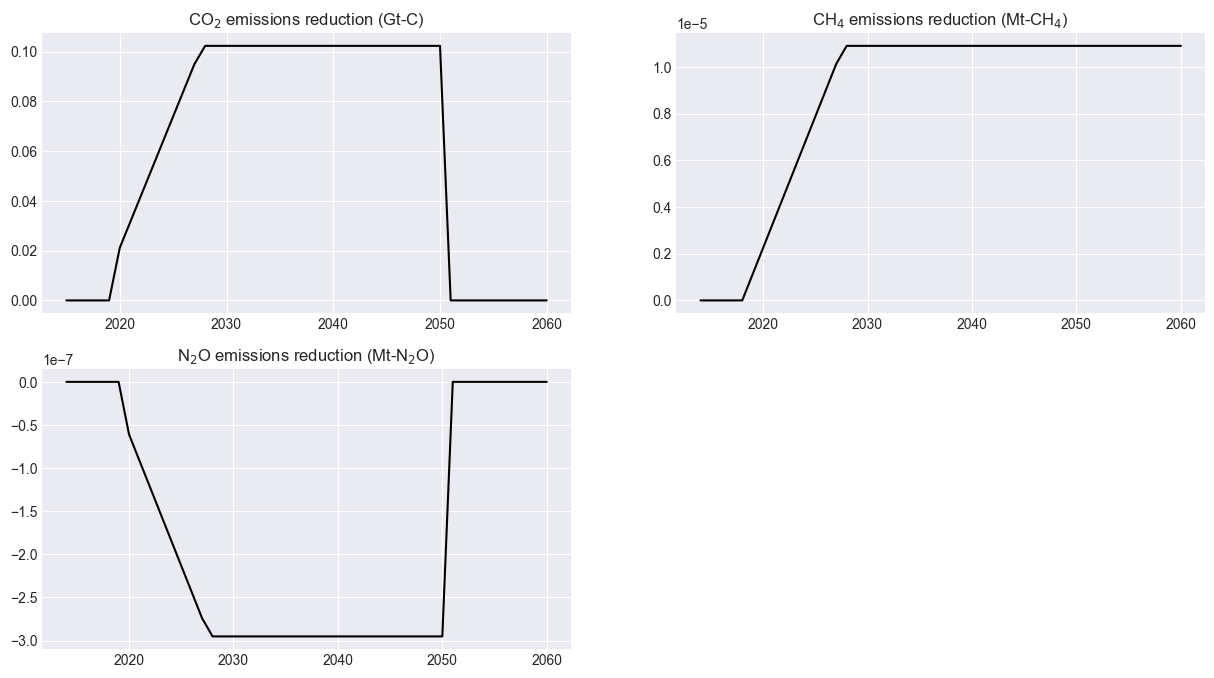

In [45]:
# We can use the following function to get the annual greenhouse gas emission reductions of carbon dioxide (CO2),
# methane (CH4), and nitrous oxide (N2O)

emisreduction_annual = rice_pds3.c2.ghg_emissions_reductions_global_annual()

# Plotting the results for a quick result:
plt.rcParams['figure.figsize'] = (15, 8)
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(emisreduction_annual.index, emisreduction_annual.iloc[:,0], color='black')
ax1.set_title('CO$_2$ emissions reduction (Gt-C)')
ax2 = fig.add_subplot(222)
ax2.plot(emisreduction_annual.index, emisreduction_annual.iloc[:,1], color='black')
ax2.set_title('CH$_4$ emissions reduction (Mt-CH$_4$)')
ax3 = fig.add_subplot(223)
ax3.plot(emisreduction_annual.index, emisreduction_annual.iloc[:,2], color='black')
ax3.set_title('N$_2$O emissions reduction (Mt-N$_2$O)');

In [46]:
# What about the cumulative emission reductions over the modeled time? We can use:

emisreduction_cumulative = rice_pds1.c2.ghg_emissions_reductions_global_cumulative()
emisreduction_cumulative

CO2 (Gt-C)      2.817747
CH4 (Mt-CH4)    0.000410
N2O (Mt-N2O)   -0.000008
Name: ghg_emissions_reductions_global_cumulative, dtype: float64

In [47]:
# To get our emission reduction results as a single number:

# Units: Mt CO2-eq

ghgreduced_co2eq = rice_pds3.c2.co2eq_mmt_reduced()
ghgreduced_co2eq_cumulative = ghgreduced_co2eq.sum(axis=0)
ghgreduced_co2eq_cumulative

World                     7783.202754
OECD90                       0.000000
Eastern Europe               0.000000
Asia (Sans Japan)            0.000000
Middle East and Africa       0.000000
Latin America                0.000000
China                        0.000000
India                        0.000000
EU                           0.000000
USA                          0.000000
dtype: float64

In [48]:
# TODO:
# We need some utility functions to produce nice summary results, and then we should demonstrate them here,
# also including some nice graphs.